# Диагностика моделей классификации

### 1. Диагностика модели классификации (Precision, Recall, F1)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from yellowbrick.model_selection import LearningCurve
import warnings
# Игнорировать все предупреждения
warnings.simplefilter("ignore")

In [12]:
# Генерация синтетических данных
X, y = make_classification(n_samples=10000, n_features=500, 
                           n_informative=50, n_repeated=0,
                           class_sep=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=3)

Training Metrics
Accuracy: 0.8413
Precision: 0.8337
Recall: 0.8515
F1: 0.8425

Test Metrics
Accuracy: 0.8056
Precision: 0.8069
Recall: 0.8056
F1: 0.8062



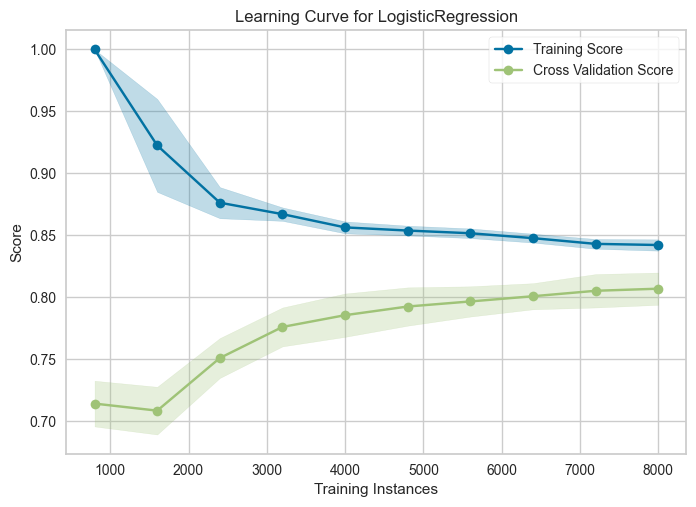

<Axes: title={'center': 'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [13]:
# Логистическая регрессия
lr = LogisticRegression(max_iter=200).fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("Training Metrics")
print(f"Accuracy: {lr.score(X_train, y_train):.4f}")
print(f"Precision: {precision_score(y_train, y_pred_train):.4f}")
print(f"Recall: {recall_score(y_train, y_pred_train):.4f}")
print(f"F1: {f1_score(y_train, y_pred_train):.4f}\n")

print("Test Metrics")
print(f"Accuracy: {lr.score(X_test, y_test):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_test):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_test):.4f}")
print(f"F1: {f1_score(y_test, y_pred_test):.4f}\n")

# Кривая обучения
visualizer = LearningCurve(LogisticRegression(max_iter=200), 
                           train_sizes=np.linspace(0.1, 1.0, 10)).fit(X, y)
visualizer.show()

### 2. Регрессия (Метод опорных векторов, KNN, Решающее дерево)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [20]:
# Загрузка данных из локального файла
dataset = pd.read_csv("/Users/olegsuhov/Downloads/BostonHousing.csv")

# Разделяем признаки и целевую переменную
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

# Разбиваем данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


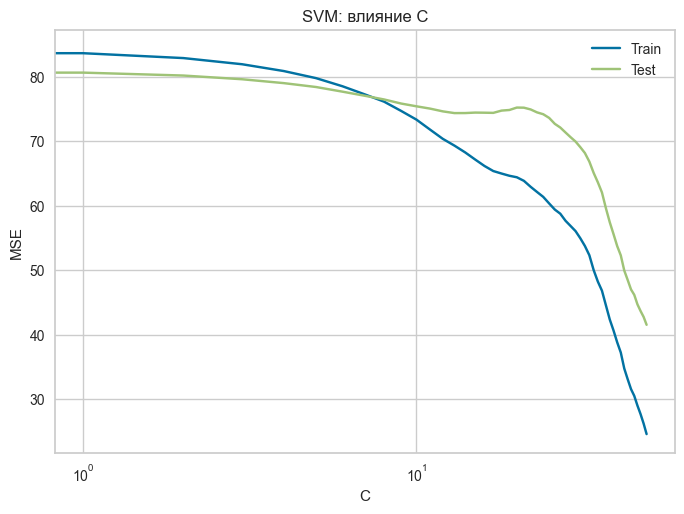

In [21]:
# Метод опорных векторов
trains, tests = [], []
for C in np.logspace(-2, 3, 50):
    svr = SVR(C=C)
    svr.fit(X_train, y_train)
    trains.append(mean_squared_error(y_train, svr.predict(X_train)))
    tests.append(mean_squared_error(y_test, svr.predict(X_test)))

plt.plot(trains, label='Train')
plt.plot(tests, label='Test')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('MSE')
plt.legend()
plt.title('SVM: влияние C')
plt.show()

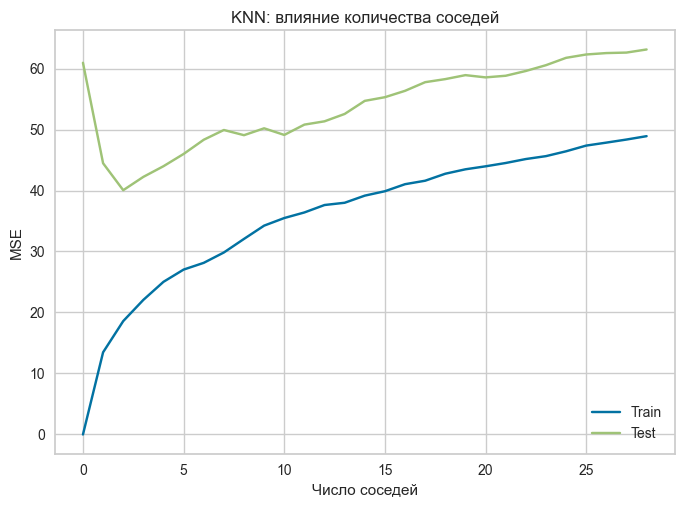

In [22]:
# Метод ближайших соседей
trains, tests = [], []
for k in range(1, 30):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    trains.append(mean_squared_error(y_train, knn.predict(X_train)))
    tests.append(mean_squared_error(y_test, knn.predict(X_test)))

plt.plot(trains, label='Train')
plt.plot(tests, label='Test')
plt.xlabel('Число соседей')
plt.ylabel('MSE')
plt.legend()
plt.title('KNN: влияние количества соседей')
plt.show()

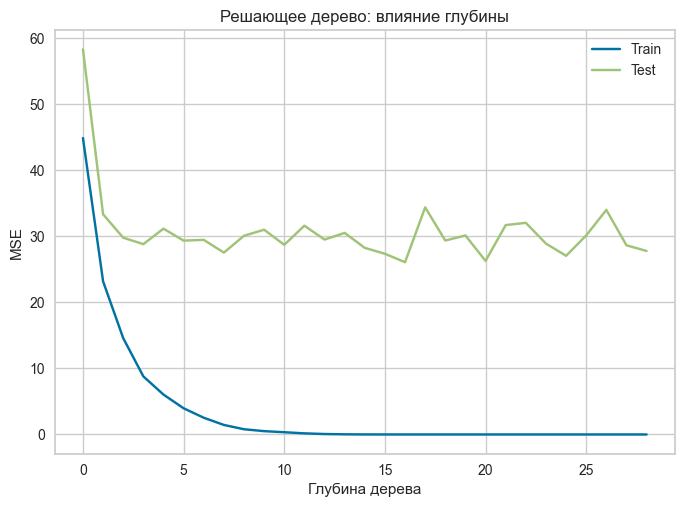

In [23]:
# Решающее дерево
trains, tests = [], []
for depth in range(1, 30):
    tree = DecisionTreeRegressor(max_depth=depth)
    tree.fit(X_train, y_train)
    trains.append(mean_squared_error(y_train, tree.predict(X_train)))
    tests.append(mean_squared_error(y_test, tree.predict(X_test)))

plt.plot(trains, label='Train')
plt.plot(tests, label='Test')
plt.xlabel('Глубина дерева')
plt.ylabel('MSE')
plt.legend()
plt.title('Решающее дерево: влияние глубины')
plt.show()

### 3. Регуляризация в Lasso

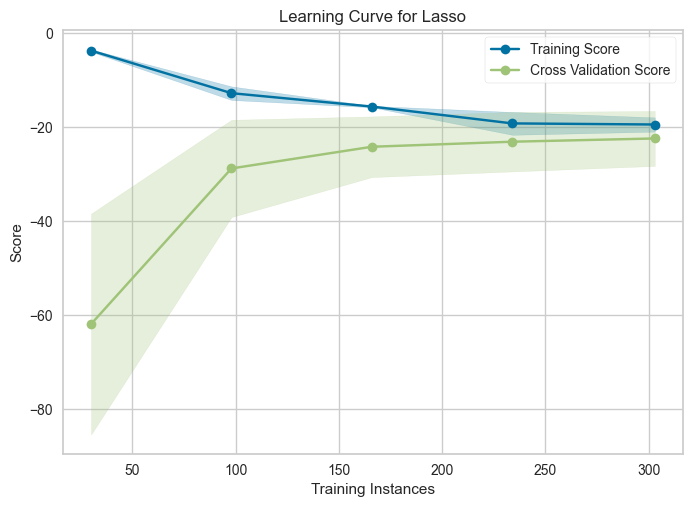

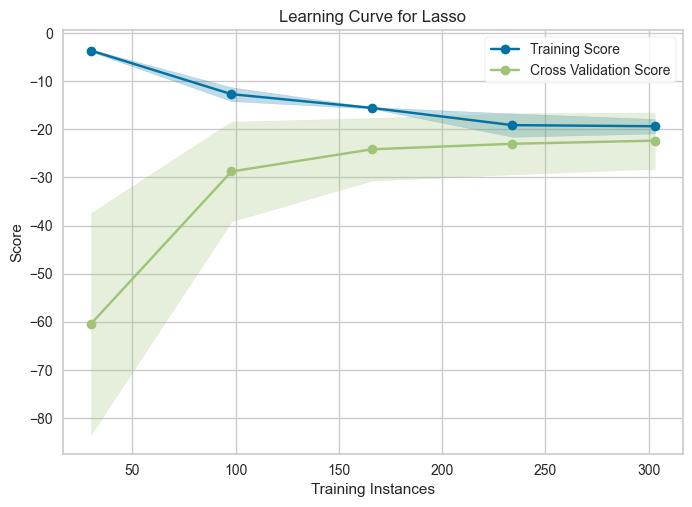

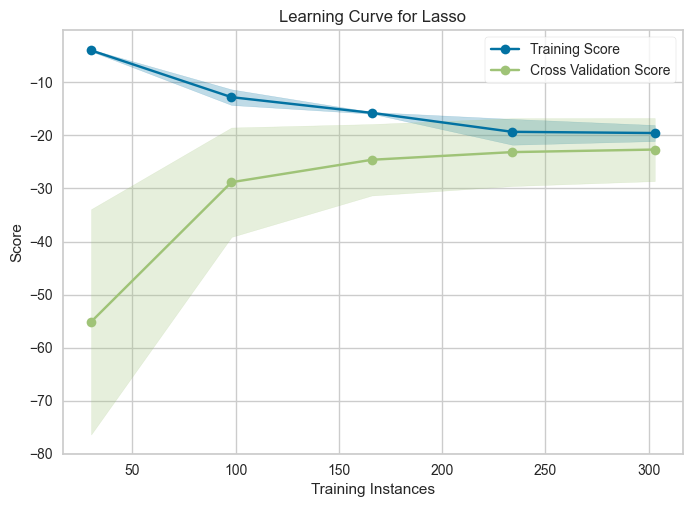

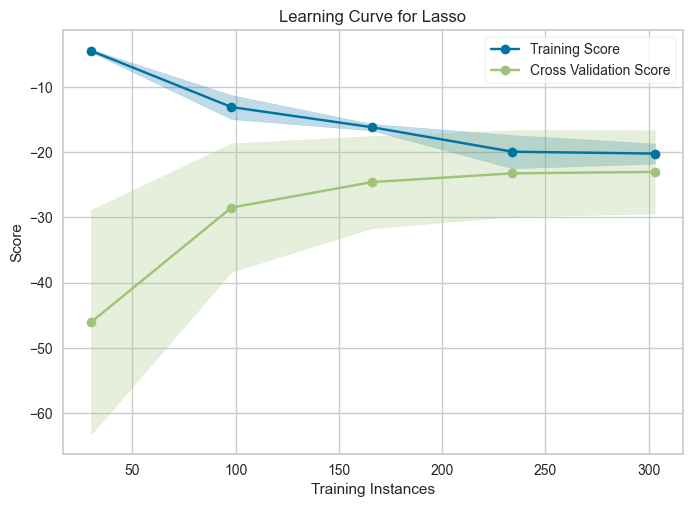

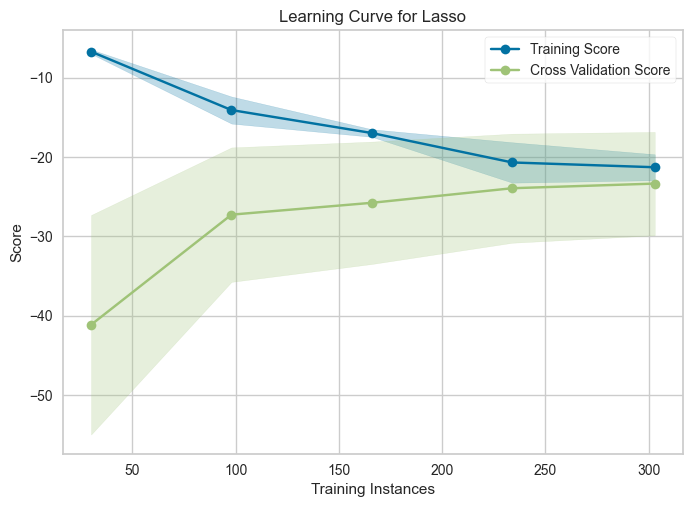

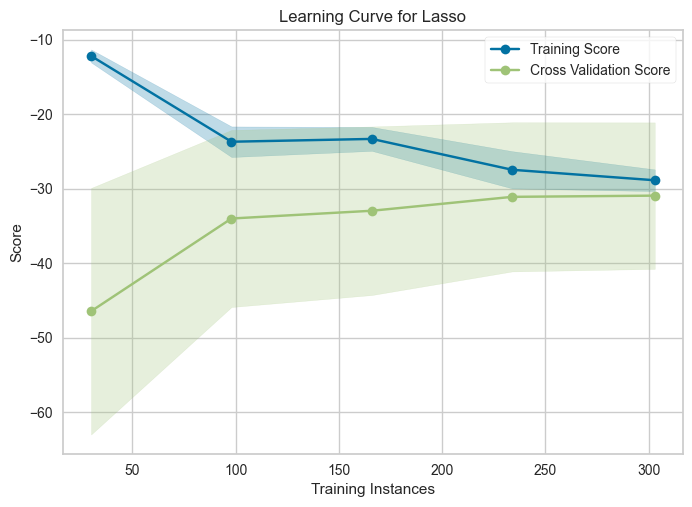

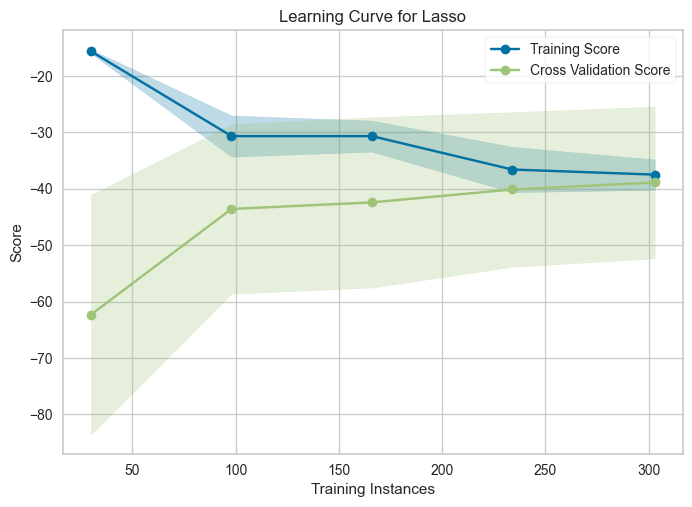

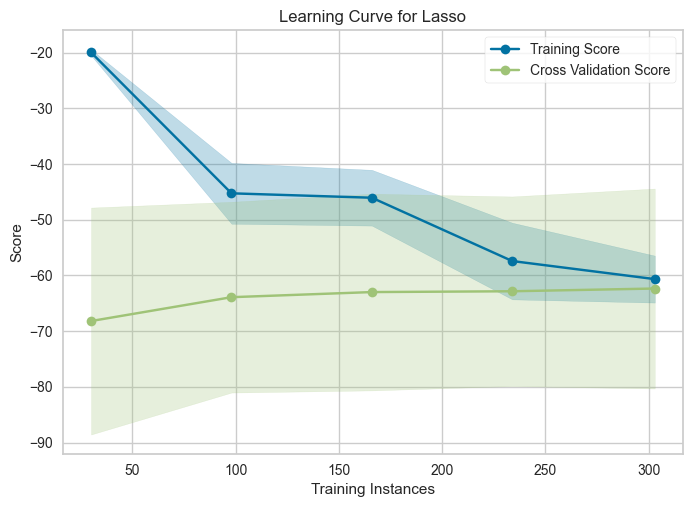

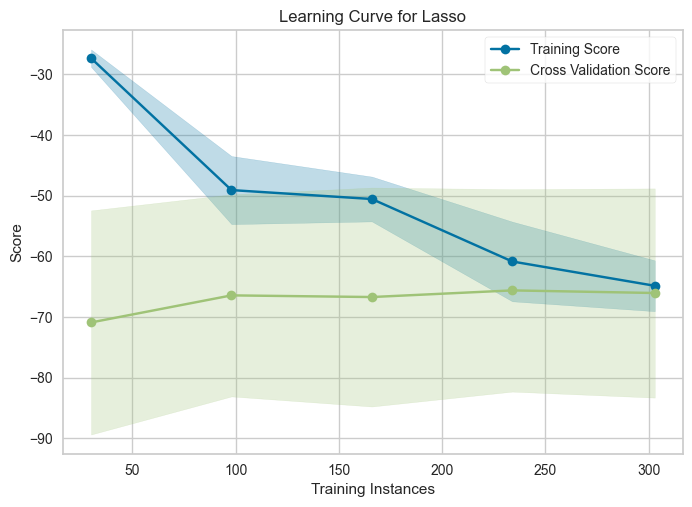

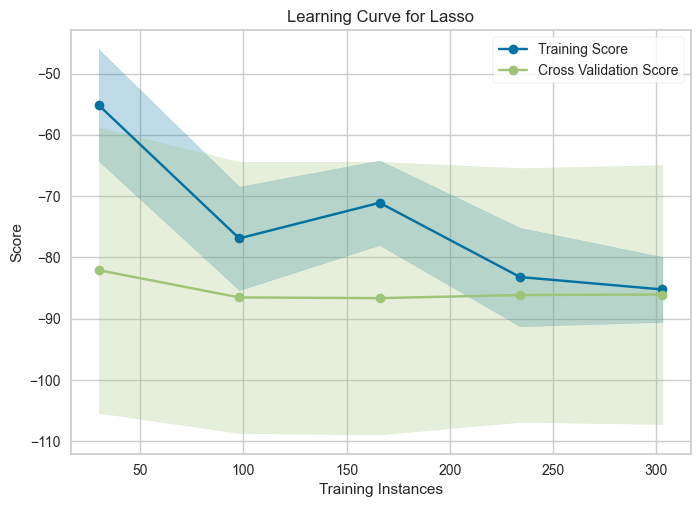

In [24]:
from sklearn.linear_model import Lasso
from yellowbrick.model_selection import LearningCurve

for alpha in np.logspace(-3, 3, 10):
    model = Lasso(alpha=alpha)
    visualizer = LearningCurve(model, scoring='neg_mean_squared_error', n_jobs=-1).fit(X_train, y_train)
    visualizer.show()

### 4. ElasticNet (Два параметра регуляризации)

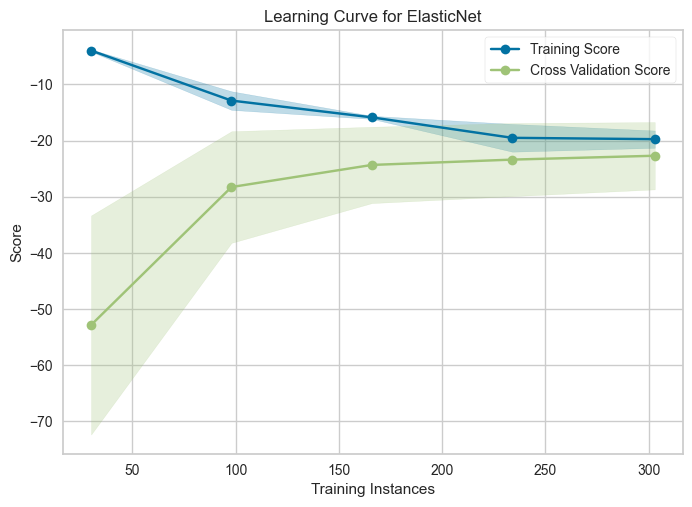

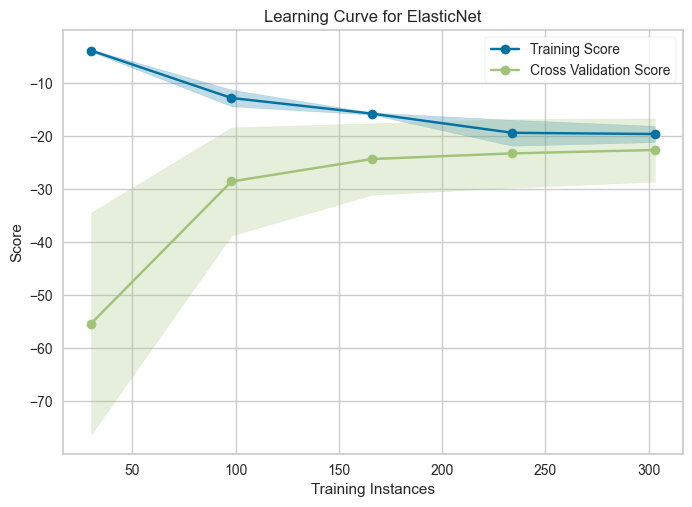

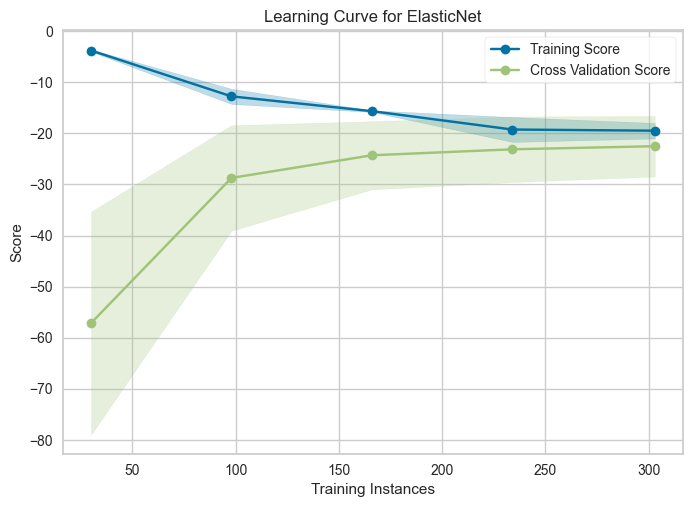

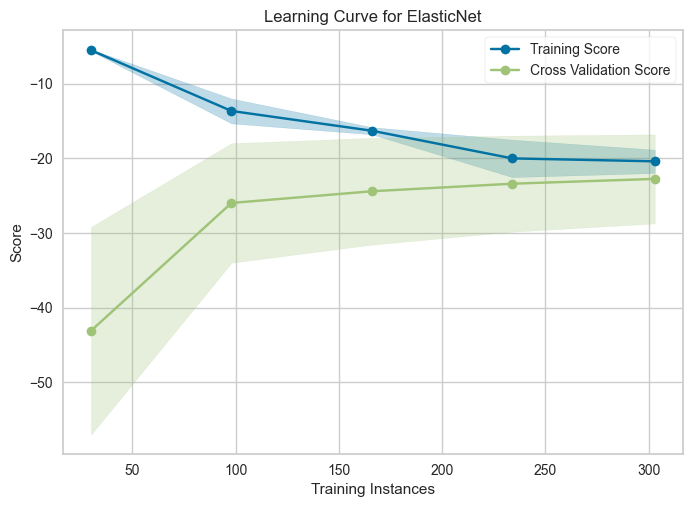

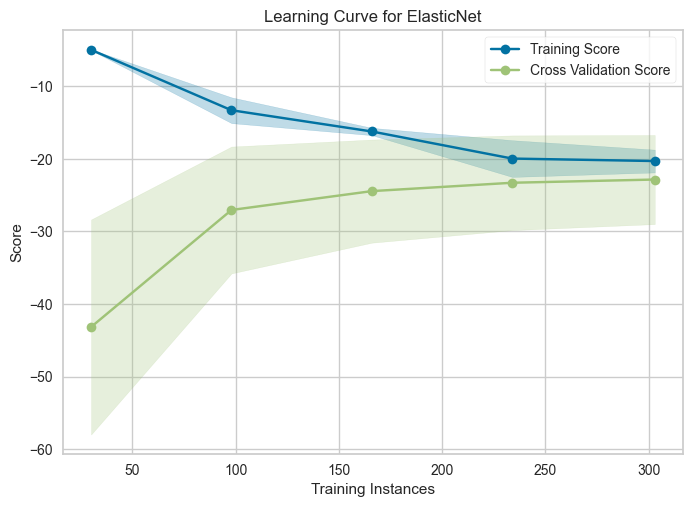

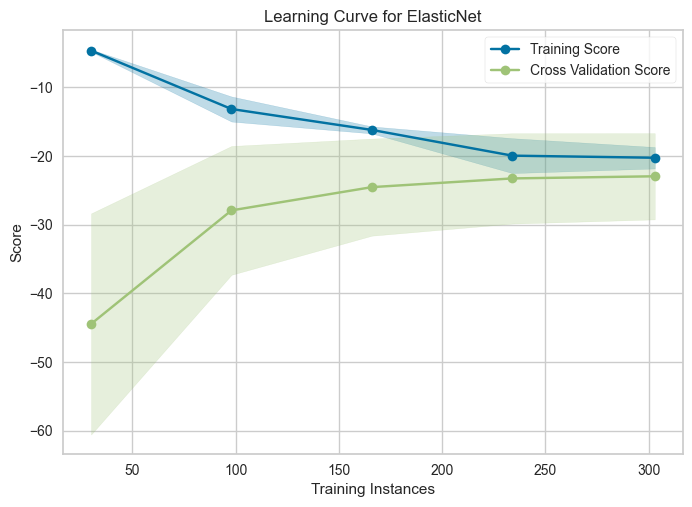

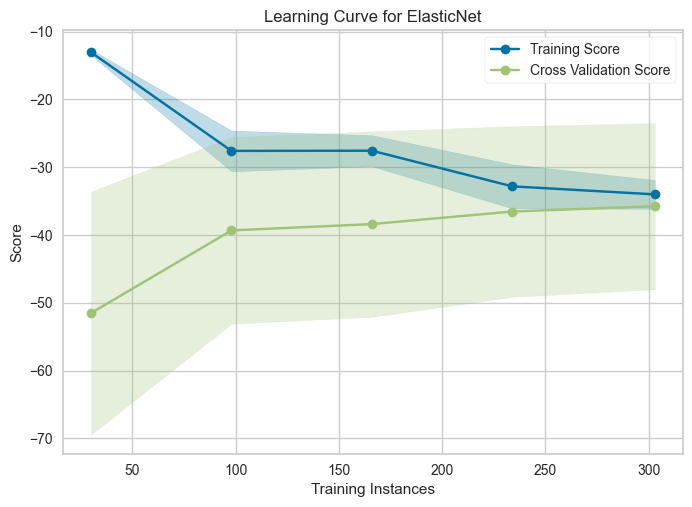

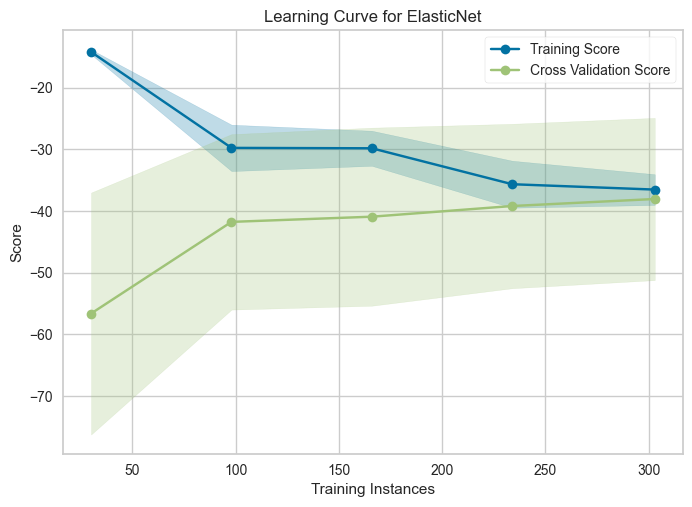

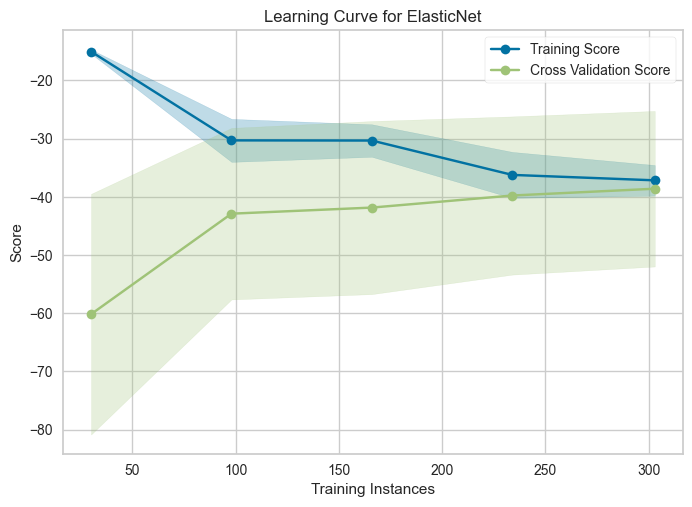

In [25]:
from sklearn.linear_model import ElasticNet

for alpha in [0.01, 0.1, 10]:
    for l1_ratio in [0.3, 0.7, 0.9]:
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        visualizer = LearningCurve(model, scoring='neg_mean_squared_error', n_jobs=-1).fit(X_train, y_train)
        visualizer.show()

### 5. Анализ DecisionTreeClassifier (Оптимизация глубины)

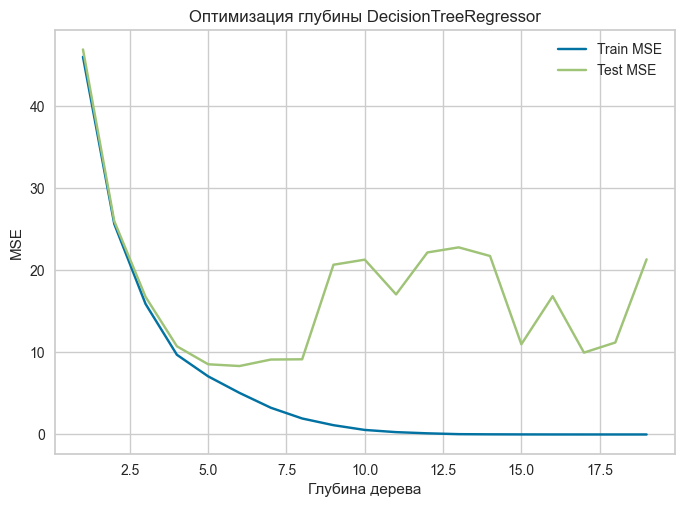

Оптимальная глубина дерева: 6


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Загрузка данных
df = pd.read_csv("/Users/olegsuhov/Downloads/BostonHousing.csv")
# Разделяем признаки и целевую переменную
X = df.drop(columns=["medv"])  # Все колонки, кроме "medv", это признаки
y = df["medv"]  # Целевая переменная

# Разбиваем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Оптимизация глубины дерева
trains, tests = [], []
depths = range(1, 20)

for depth in depths:
    model = DecisionTreeRegressor(random_state=1, max_depth=depth)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    trains.append(mean_squared_error(y_train, train_pred))
    tests.append(mean_squared_error(y_test, test_pred))

plt.plot(depths, trains, label="Train MSE")
plt.plot(depths, tests, label="Test MSE")
plt.xlabel("Глубина дерева")
plt.ylabel("MSE")
plt.title("Оптимизация глубины DecisionTreeRegressor")
plt.legend()
plt.show()

# Выводим лучшую глубину
best_depth = depths[np.argmin(tests)]
print(f"Оптимальная глубина дерева: {best_depth}")